# Importation des données

In [3]:
# On importe les librairies dont on a besoin
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# On charge le dataset
data = pd.read_csv("/Users/marinejacquemin/Downloads/movie_metadata.csv")

# Nettoyage des données

In [4]:
print (data.shape)

(5043, 28)


In [5]:
data2=data.drop(['movie_imdb_link'],1)
#data2 = data2.drop_duplicates(subset='movie_title')
#data2.shape
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 27 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
num_user_for_reviews         5022 non-

In [6]:
#on traite le cas des features genres et plot_keywords
data2=data2.fillna(0)
#on split les words into several columns
split_tbl_genres = data2.genres.str.split(pat='|',expand=True).rename(columns = lambda x: "key_word"+str(x+1))

In [7]:
split_tbl_genres.head()

,key_word1,key_word2,key_word3,key_word4,key_word5,key_word6,key_word7,key_word8
0,Action,Adventure,Fantasy,Sci-Fi,None,None,None,None
1,Action,Adventure,Fantasy,None,None,None,None,None
2,Action,Adventure,Thriller,None,None,None,None,None
3,Action,Thriller,None,None,None,None,None,None
4,Documentary,None,None,None,None,None,None,None


In [8]:
tbl_genres = split_tbl_genres.stack()
#creation d'un dictionnaire qui renvoie la nombre d'apparition du genre
unique, counts = np.unique(tbl_genres, return_counts=True)
dic_genres = dict(zip(unique, counts))
dic_genres

{'Action': 1153,
 'Adventure': 923,
 'Animation': 242,
 'Biography': 293,
 'Comedy': 1872,
 'Crime': 889,
 'Documentary': 121,
 'Drama': 2594,
 'Family': 546,
 'Fantasy': 610,
 'Film-Noir': 6,
 'Game-Show': 1,
 'History': 207,
 'Horror': 565,
 'Music': 214,
 'Musical': 132,
 'Mystery': 500,
 'News': 3,
 'Reality-TV': 2,
 'Romance': 1107,
 'Sci-Fi': 616,
 'Short': 5,
 'Sport': 182,
 'Thriller': 1411,
 'War': 213,
 'Western': 97}

In [9]:
#get dummies for genres
df_genres = pd.get_dummies(tbl_genres)
df_genres.head()

Action  Adventure  Animation  Biography  Comedy  Crime  \
0 key_word1       1          0          0          0       0      0   
  key_word2       0          1          0          0       0      0   
  key_word3       0          0          0          0       0      0   
  key_word4       0          0          0          0       0      0   
1 key_word1       1          0          0          0       0      0   

             Documentary  Drama  Family  Fantasy   ...     Mystery  News  \
0 key_word1            0      0       0        0   ...           0     0   
  key_word2            0      0       0        0   ...           0     0   
  key_word3            0      0       0        1   ...           0     0   
  key_word4            0      0       0        0   ...           0     0   
1 key_word1            0      0       0        0   ...           0     0   

             Reality-TV  Romance  Sci-Fi  Short  Sport  Thriller  War  Western  
0 key_word1           0        0       0      0      0         0    0        0  
  key_word2           0        0       0      0      0         0    0        0  
  key_word3           0        0       0      0      0         0    0        0  
  key_word4           0        0       1      0      0         0    0        0  
1 key_word1           0        0       0      0      0         0    0        0  

[5 rows x 26 columns]

In [10]:
#group by index the get the final tbl to append

#df_genres = df_genres.reset_index(level=1, drop=True)
df_genres2 = df_genres.groupby(level=0).sum()
df_genres2.head(5)

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
#same logic with key words (kw)
split_tbl_kw = data2.plot_keywords.str.split(pat='|',expand=True).rename(columns = lambda x: "key_word"+str(x+1))

tbl_kw = split_tbl_kw.stack()
#creation d'un dictionnaire qui renvoie la nombre d'apparition du keyword
unique, counts = np.unique(tbl_kw, return_counts=True)
dic_kw = dict(zip(unique, counts))
dic_kw


{'10 year old': 1,
 '1000000 b.c.': 1,
 '1190s': 1,
 '12 step program': 2,
 '12 year old': 2,
 '12 year time span': 1,
 '12th century': 1,
 '13 year old': 1,
 '13 year olds': 1,
 '13th birthday': 1,
 '14 year old': 2,
 '14th century': 2,
 '15 year old': 2,
 '1520s': 1,
 '15th birthday': 1,
 '15th century': 1,
 '16 year old': 1,
 '16th century': 4,
 '1770s': 2,
 '17th century': 5,
 '18 wheeler': 2,
 '1800s': 5,
 '1810s': 1,
 '1830s': 1,
 '1850s': 1,
 '1860s': 1,
 '1880s': 3,
 '1890s': 1,
 '18th birthday': 2,
 '18th century': 6,
 '1910s': 3,
 '1920s': 7,
 '1930s': 14,
 '1940s': 11,
 '1950s': 22,
 '1955 chevrolet': 1,
 '1959 cadillac': 1,
 '1960s': 24,
 '1969 dodge charger': 1,
 '1970s': 22,
 '1980s': 25,
 '1988 winter olympics': 2,
 '1990s': 17,
 '19th century': 16,
 '1st century': 1,
 '1st century b.c.': 1,
 '20 years later': 1,
 '2000s': 12,
 '2010s': 4,
 '2020s': 1,
 '2030s': 1,
 '20th century': 1,
 '21 year old': 1,
 '21st birthday': 1,
 '21st century': 3,
 '22 year old': 1,
 '22nd c

In [12]:
#on retire les keywords qui apparaissent moins de deux fois
tbl_kw2=pd.DataFrame(tbl_kw,columns=['words'])
tbl_kw2=tbl_kw2.reset_index()

for item, value in enumerate(tbl_kw):
    if dic_kw[value]<3:
        tbl_kw2 = tbl_kw2.replace(tbl_kw2.words.loc[item],0)    

In [13]:
#reset index
tbl_kw2 = tbl_kw2.drop(['level_1'],axis=1)
tbl_kw2 = tbl_kw2.set_index('level_0')
tbl_kw2=tbl_kw2.rename(columns={"words": ""})
tbl_kw2.head()

,
level_0,
0,avatar
0,future
0,marine
0,0
0,0


In [14]:
#get dummies for keywords
df_kw = pd.get_dummies(tbl_kw2)

#group by index the get the final tbl to append
df_kw = df_kw.groupby(level=0).sum()
df_kw = df_kw.drop([x for x in df_kw if x.endswith('_0')], 1)
df_kw.head()

,_16th century,_17th century,_1800s,_1880s,_18th century,_1910s,_1920s,_1930s,_1940s,_1950s,...,_wyoming,_x men,_yacht,_yakuza,_yard sale,_yorkshire,_zeus,_zombie,_zombie apocalypse,_zoo
level_0,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Encode categorical features

In [15]:
#special case key words and genres
#get the list of categorical data (drop feature movie title and key words)
to_encode = data2.select_dtypes(include=['object'])
to_encode = to_encode.drop(['plot_keywords','movie_title','genres'],1)


In [16]:
#encode features in list if element present at least 3 times (except movie title and key words)
#First get all values below treshold with value_counts and boolean indexing and in dict comprehension add same scalar value like 0.
tresh = 3

df = to_encode
for col in to_encode.columns : 
    s = data2[col].value_counts()
    d = {x:0 for x in s[s < tresh].index}
    df = df.replace(d)


In [17]:
df.head()

,color,director_name,actor_2_name,actor_1_name,actor_3_name,language,country,content_rating
0,Color,James Cameron,0,0,0,English,USA,PG-13
1,Color,Gore Verbinski,0,Johnny Depp,0,English,USA,PG-13
2,Color,Sam Mendes,0,0,0,English,UK,PG-13
3,Color,Christopher Nolan,Christian Bale,0,0,English,USA,PG-13
4,0,0,0,0,0,0,0,0


In [18]:
df1 = pd.get_dummies(df)
#Drop columns with dont need
df1 = df1.drop([x for x in df1 if x.endswith('_0')], 1)

In [19]:
# use pd.concat to join the new columns with the original dataframe
df2 = pd.concat([df1,data2,df_genres2,df_kw],axis=1)

In [20]:
df2=df2.fillna(0)

In [21]:
df3 = df2.drop([x for x in to_encode.columns], 1)

In [22]:
df3 = df3.drop(['plot_keywords','genres'],1)
#the output is a cleaned dataset

In [23]:
df3.shape

(5043, 2953)

# Exploratory Analysis : KNN

In [24]:
X = np.array(df3.drop(['movie_title'],1))

In [208]:
#test  - vérité terrain

In [32]:
from sklearn.neighbors import NearestNeighbors
# Create the knn model.
# Look at the five closest neighbors - with the Manhattan distance
knn = NearestNeighbors(algorithm='auto', leaf_size=30, n_neighbors=6, metric='manhattan',
         radius=1.0)
knn.fit(X)

k=240
array=knn.kneighbors(X[k].reshape(1, -1), return_distance=False)

for i in range(0,array.size):
    j = array.item(i)
    print(df3.loc[j,'movie_title'])

Star Wars: Episode I - The Phantom Menace 
The Hunger Games: Catching Fire 
Shrek 2 
Spider-Man 
Star Wars: Episode III - Revenge of the Sith 
The Hunger Games 


In [523]:
# Look at the five closest neighbors - with the canberra distance
knn = NearestNeighbors(algorithm='auto', leaf_size=30, n_neighbors=6, metric='canberra',
         radius=1.0)
knn.fit(X)

k=240
array=knn.kneighbors(X[k].reshape(1, -1), return_distance=False)

for i in range(0,array.size):
    j = array.item(i)
    print(df3.movie_title.loc[j])

Star Wars: Episode I - The Phantom Menace 
Star Wars: Episode II - Attack of the Clones 
Star Wars: Episode III - Revenge of the Sith 
Star Wars: Episode IV - A New Hope 
Star Wars: Episode VI - Return of the Jedi 
Star Wars: Episode V - The Empire Strikes Back 


In [478]:
#Après avoir tester plusieurs distances (cf tbl tests vérité terrain), on conclue que pour la méthode du KNN,
#canberra est la meilleure distance

In [528]:
df3.movie_title.head(200)

0                                                Avatar 
1              Pirates of the Caribbean: At World's End 
2                                               Spectre 
3                                 The Dark Knight Rises 
4      Star Wars: Episode VII - The Force Awakens    ...
5                                           John Carter 
6                                          Spider-Man 3 
7                                               Tangled 
8                               Avengers: Age of Ultron 
9                Harry Potter and the Half-Blood Prince 
10                   Batman v Superman: Dawn of Justice 
11                                     Superman Returns 
12                                    Quantum of Solace 
13           Pirates of the Caribbean: Dead Man's Chest 
14                                      The Lone Ranger 
15                                         Man of Steel 
16             The Chronicles of Narnia: Prince Caspian 
17                             

In [101]:
df3[df3['movie_title'].str.contains('Harry')]

,color_ Black and White,color_Color,director_name_Adam McKay,director_name_Adam Shankman,director_name_Adrian Lyne,director_name_Akiva Schaffer,director_name_Alan Parker,director_name_Albert Hughes,director_name_Alejandro Amenábar,director_name_Alejandro G. Iñárritu,...,_wyoming,_x men,_yacht,_yakuza,_yard sale,_yorkshire,_zeus,_zombie,_zombie apocalypse,_zoo
9,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
114,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
115,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
195,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
199,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
202,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
206,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
285,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1671,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2287,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Exploratory Analysis : K-means

In [24]:
#on normalise les données 
from sklearn import preprocessing
X_norm = preprocessing.scale(X)

In [32]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = [310,315,320,325,330,335,340,345]
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_norm)
    Sum_of_squared_distances.append(km.inertia_)

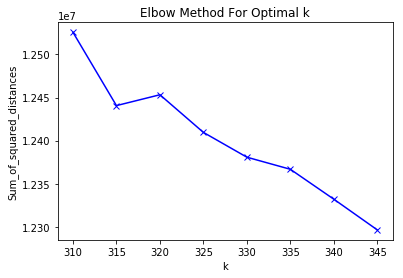

In [33]:
#Recherche du K optimal
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [38]:
Sum_of_squared_distances = []
K = [800,900,1000,1100]
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_norm)
    Sum_of_squared_distances.append(km.inertia_)

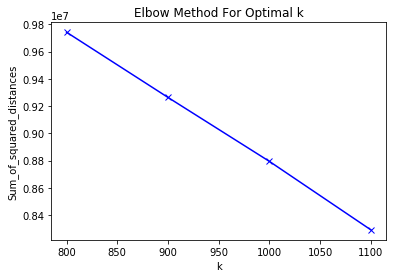

In [39]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [36]:
#on remarque la difficulté à trouver un K optimal, ici la elbow method ne fonctionne pas pour trouver K 
Sum_of_squared_distances = []
K = [400,500,600,700,800]
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_norm)
    Sum_of_squared_distances.append(km.inertia_)

In [104]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=330) 
km = kmeans.fit(X_norm)

In [105]:
#on regroupe dans un tbl les titres de films avec le numero de cluster associé
cluster_map = pd.DataFrame()
cluster_map['data_index'] = df3.index.values
cluster_map['movie_title'] = df3.movie_title.values
cluster_map['cluster']= km.labels_

In [107]:
#on affiche les films présents dans un même cluster à partir de l'index d'un film
index = 195
num_cluster = cluster_map.cluster.loc[index]
print(cluster_map[cluster_map.cluster == num_cluster])

      data_index                                        movie_title  cluster
2              2                                           Spectre        80
4              4  Star Wars: Episode VII - The Force Awakens    ...       80
12            12                                 Quantum of Solace        80
57            57                                  Star Trek Beyond        80
84            84                                        The Lovers        80
98            98                               Godzilla Resurgence        80
110          110  The Chronicles of Narnia: The Voyage of the Da...       80
113          113                                         Alexander        80
144          144                                      Flushed Away        80
149          149                                   Die Another Day        80
169          169                                            Sahara        80
172          172                           The World Is Not Enough        80

# Classification ascendante hiérarchique

In [48]:
from scipy.cluster.hierarchy import dendrogram, linkage

#générer la matrice des liens
Z = linkage(X,method='ward',metric='euclidean')

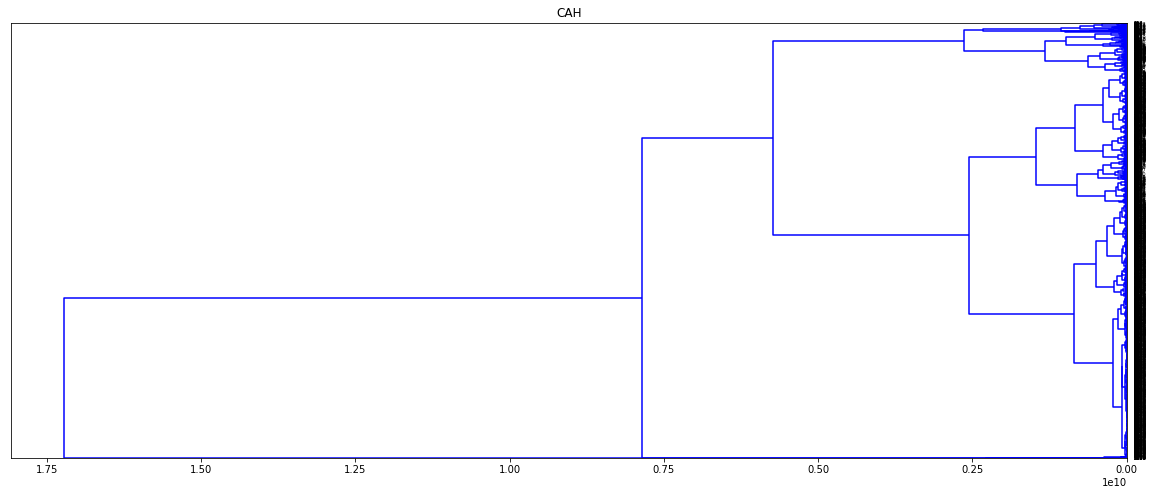

In [539]:
fig = plt.figure( figsize=(20,8) )
plt.title("CAH") 
dendrogram(Z,labels=df3.index,orientation='left',color_threshold=0)
plt.show()

In [91]:
#comme pour la méthode des Kmeans, on va créer 300-350 clusters
import scipy.cluster.hierarchy as sch

groupes_cah = sch.fcluster(Z,t=19000000,criterion='distance') 
print(np.unique(groupes_cah).size, "groupes constitués")

349 groupes constitués


In [92]:
#index triés des groupes
idg = np.argsort(groupes_cah)

#affichage des observations et leurs groupes
df_aha = pd.DataFrame()
df_aha['movie_title'] = df3.movie_title.values
df_aha['groupe_id'] =groupes_cah[idg]


In [99]:
#on affiche les films présents dans un même cluster à partir de l'index d'un film
index_aha = 236
num_cluster_aha = df_aha.groupe_id.loc[index_aha]
df_aha[df_aha.groupe_id == num_cluster_aha]

,movie_title,groupe_id
213,Clash of the Titans,7
214,Total Recall,7
215,The 13th Warrior,7
216,The Bourne Legacy,7
217,Batman & Robin,7
218,How the Grinch Stole Christmas,7
219,The Day After Tomorrow,7
220,Mission: Impossible II,7
221,The Perfect Storm,7
222,Fantastic 4: Rise of the Silver Surfer,7


# Select the best model : KNN - Canberra metric

In [79]:
# Look at the five closest neighbors - with the canberra distance
#Creation d'une table de reconnaissance

knn = NearestNeighbors(algorithm='auto', leaf_size=30, n_neighbors=6, metric='canberra',
         radius=1.0)
knn.fit(X)

In [124]:
knn_tbl = pd.DataFrame()


for k, row in df3.iterrows():
    array=knn.kneighbors(X[k].reshape(1, -1), return_distance=False)
    line = [k]
    
    for i in range(0,array.size):
        j = array.item(i)
        line.append(df3.movie_title.loc[j])
        
    knn_tbl = knn_tbl.append([line],ignore_index=True)

In [126]:
knn_tbl.shape
#on obtient bien notre table de conrespondance à exporter puis à utiliser pour l'API

(5043, 7)

In [127]:
knn_tbl.columns = ['Film_ID','Film','Film1','Film2','Film3','Film4','Film5']

In [129]:
knn_tbl.to_csv("/Users/marinejacquemin/Desktop/knn_tbl.csv")